# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-HES-ALM/master/main/ds-masters/content/images/hes-logo.png"> CSCI E-82: Advanced ML, Data Mining and AI
</br>


**Harvard Extension School - Fall 2024**<br/>

**Homework 5**: </br>

**Professor**: Dr. Peter V. Henstock<br/>

**Team Name**: ROC & Rolls</br>
**Students**: </br>

**Due Date**: 25/Nov/2024, 8:00pm EST</br>

----

<hr style="height:2pt">

a

In [21]:
# RUN THIS CELL TO GET CSS Styles for CSC-S-82
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-HES-ALM/master/main/master/content/styles/"
    "csci-e-82.css"
).text

**Load all libraries needed for our homework**

In [22]:
import string
import re
import pandas as pd # pip install pandas
import numpy as np
import matplotlib.pyplot as plt # pip install matplotlib
import seaborn as sns # pip install seaborn
import pickle

from sklearn import manifold

import nltk # pip install nltk
from nltk.corpus import stopwords 
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

import seaborn as sns

from nltk.stem.porter import PorterStemmer

import spacy # pip install spacy

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # pip install scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
import gensim # pip install gensim
from gensim.models import word2vec  #pip install word2vec

# from wordcloud import WordCloud  # pip install wordcloud
# from textblob import TextBlob  # Sentiment Analysis - pip install textblob
# from sentence_transformers import SentenceTransformer, util # pip install sentence_transformers

In [26]:
df = pd.read_csv('data/debates.csv', encoding='latin1')
# df = pd.read_csv('data/debates.csv', encoding='latin1')
display(df.head())
len(df['event_id'].unique())

,event_id,speaker_names_raw,rawtext,Order,Year,Party,PartyWin,Round,AgeDem,AgeRep,AgeDiff,InflationRate,GDPgrowth
0,1960_KennedyNixon_Rd1,KENNEDY,"Mr. Smith, Mr. Nixon. In the election of 1860...",1,1960,democrat,democrat,1,43,47,4,1.46,NaN
1,1960_KennedyNixon_Rd1,NIXON,"Mr. Smith, Senator Kennedy. The things that S...",1,1960,republican,democrat,1,43,47,4,1.46,NaN
2,1960_KennedyNixon_Rd1,KENNEDY,"Well, the Vice President and I came to the Co...",1,1960,democrat,democrat,1,43,47,4,1.46,NaN
3,1960_KennedyNixon_Rd1,NIXON,I have no comment.,1,1960,republican,democrat,1,43,47,4,1.46,NaN
4,1960_KennedyNixon_Rd1,NIXON,It would be rather difficult to cover them in...,1,1960,republican,democrat,1,43,47,4,1.46,NaN


31

In [28]:
df.iloc[0]['rawtext']

' Mr. Smith, Mr. Nixon. In the election of 1860, Abraham Lincoln said the question was whether this nation could exist half-slave or half-free. In the election of 1960, and with the world around us, the question is whether the world will exist half-slave or half-free, whether it will move in the direction of freedom, in the direction of the road that we are taking, or whether it will move in the direction of slavery. I think it will depend in great measure upon what we do here in the United States, on the kind of society that we build, on the kind of strength that we maintain. We discuss tonight domestic issues, but I would not want that to be any implication to be given that this does not involve directly our struggle with Mr. Khrushchev for survival. Mr. Khrushchev is in New York, and he maintains the Communist offensive throughout the world because of the productive power of the Soviet Union itself. The Chinese Communists have always had a large population. But they are important an

In [4]:
df['Year'].min(), df['Year'].max()

(1960, 2020)

In [5]:
df = pd.read_json('data/speeches.json')
display(df.head())
len(df['doc_name'].unique())

,doc_name,date,transcript,president,title
0,january-22-1807-special-message-congress-burr-...,1807-01-22,TO THE SENATE AND HOUSE OF REPRESENTATIVES OF ...,Thomas Jefferson,"January 22, 1807: Special Message to Congress ..."
1,may-25-1813-message-special-congressional-sess...,1813-05-25,Fellow-Citizens of the Senate and of the House...,James Madison,"May 25, 1813: Message on the Special Congressi..."
2,april-2-1917-address-congress-requesting-decla...,1917-04-02,I have called the Congress into extraordinary ...,Woodrow Wilson,"April 2, 1917: Address to Congress Requesting ..."
3,april-10-1975-address-us-foreign-policy,1975-04-10,"Mr. Speaker, Mr. President, distinguished gues...",Gerald Ford,"April 10, 1975: Address on U.S. Foreign Policy"
4,july-6-1848-message-regarding-treaty-guadalupe...,1848-07-06,To the House of Representatives of the United ...,James K. Polk,"July 6, 1848: Message Regarding the Treaty of ..."


1057

In [6]:
df['date'].min(), df['date'].max()

('1789-04-30', '2024-09-24T10:12:00-04:00')

In [7]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

def lower_case(text):
    text = text.lower()
    return text

def remove_punctuation(text):
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    return text

def remove_stopwords(text):
    tokens = word_tokenize(text)  # Tokenize
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)



In [8]:
df['cleaned_text'] = df['transcript'].apply(lower_case)
df['cleaned_text'] = df['cleaned_text'].apply(remove_punctuation)
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_text)

In [9]:
df.head()

,doc_name,date,transcript,president,title,cleaned_text
0,january-22-1807-special-message-congress-burr-...,1807-01-22,TO THE SENATE AND HOUSE OF REPRESENTATIVES OF ...,Thomas Jefferson,"January 22, 1807: Special Message to Congress ...",senate house representative united statesagree...
1,may-25-1813-message-special-congressional-sess...,1813-05-25,Fellow-Citizens of the Senate and of the House...,James Madison,"May 25, 1813: Message on the Special Congressi...",fellowcitizens senate house representative ear...
2,april-2-1917-address-congress-requesting-decla...,1917-04-02,I have called the Congress into extraordinary ...,Woodrow Wilson,"April 2, 1917: Address to Congress Requesting ...",called congress extraordinary session serious ...
3,april-10-1975-address-us-foreign-policy,1975-04-10,"Mr. Speaker, Mr. President, distinguished gues...",Gerald Ford,"April 10, 1975: Address on U.S. Foreign Policy",mr speaker mr president distinguished guest go...
4,july-6-1848-message-regarding-treaty-guadalupe...,1848-07-06,To the House of Representatives of the United ...,James K. Polk,"July 6, 1848: Message Regarding the Treaty of ...",house representative united state answer resol...


In [15]:
df['length'] = df['transcript'].str.len()

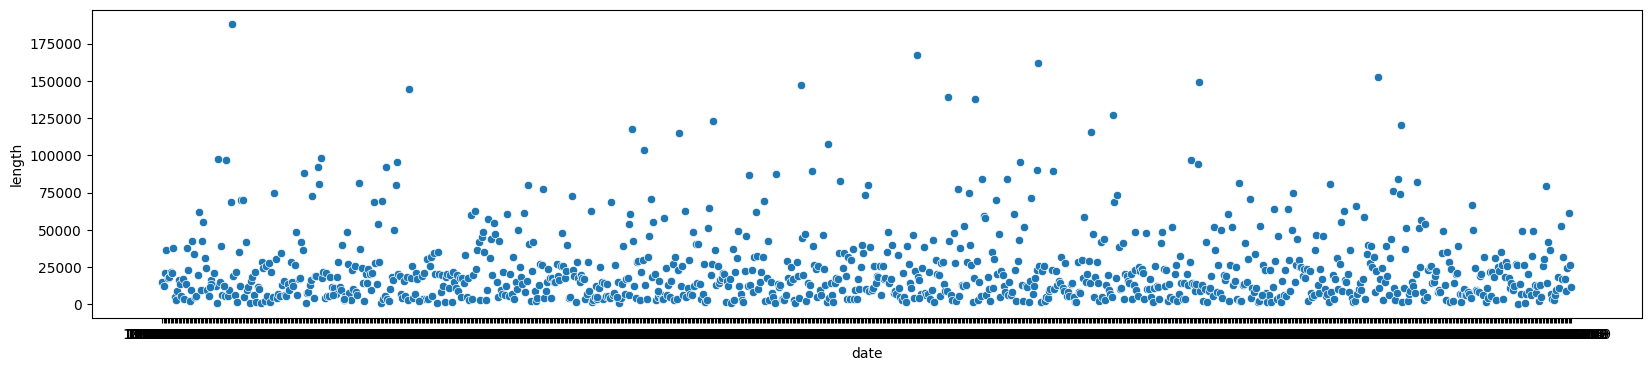

In [19]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.scatterplot(data=df, x='date', y='length');

In [13]:
df['transcript'].str.len() - df['cleaned_text'].str.len()

0        6177
1        4544
2        8326
3       12946
4        6776
        ...  
1052     3290
1053     9674
1054    22627
1055    10368
1056     4348
Length: 1057, dtype: int64

<a id='#Hours-Invested'></a>

#### Hours Invested

164 hours

<a id='#Time-for-notebook-to-run'></a>

#### Time for notebook to run


In [10]:
print(f"It took {(time.perf_counter() - start_time)/60:.2f} minutes for this notebook to run ")

NameError: name 'time' is not defined